# Final Exam - Open

## FINM 37500 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Instructions

## Please note the following:

Points
* You have `100` minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo - you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

The exam uses the following file,
`data/fiderivs_2025-03-10.xlsx`

- Section 1 uses the following sheets:
    * `rate curves`
    * quarterly spaced and quarterly compounded rates

- Section 2 uses the following sheets:
    * `rate tree`
    * continuously-compounded rate tree

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 75     |
| 2       | 25     |

Numbered problems are worth 5pts unless specified otherwise.

***

## Submitting your Exam

Submission
* You will upload your solution to the `Exam - Open` assignment on Canvas. 
* Submit a compressed, "zipped", folder containing all code according to the file structure below.
* Name your submitted, zipped, folder `exam-open-LASTNAME-FIRSTNAME.zip`.
* Be sure to **submit** on Canvas, not just **save** on Canvas.

Your submission should **include all code and data used in your analysis** in the following folder structure.
* We strongly prefer all submissions are structred this way, and it will improve grading accuracy for partial credit. 
* Still, if you're struggling to get this working in time, no worries; just structure as comfortable and submit **everything used** for your submission.

__Exam Submission Structure:__

```plaintext
exam-open-LASTNAME-FIRSTNAME.zip/
│── exam-open.ipynb
│── data/
│   ├── example_data.csv
│── modules/
│   ├── my_functions.py

### Validating your folder structure

The next cell tests that you have this folder structure implemented.

In [1]:
from pathlib import Path
import sys
import pandas as pd

# Get the directory of the notebook (assumes Jupyter Notebook is always used)
BASE_DIR = Path().resolve()

# Define paths for data and modules
DATA_DIR = BASE_DIR / "data"
MODULES_DIR = BASE_DIR / "modules"

# Check if expected directories exist
if not DATA_DIR.exists():
    print(f"Warning: Data directory '{DATA_DIR}' not found. Check your file structure.")

if not MODULES_DIR.exists():
    print(f"Warning: Modules directory '{MODULES_DIR}' not found. Check your file structure.")

# Ensure Python can import from the modules directory
if str(MODULES_DIR) not in sys.path:
    sys.path.append(str(MODULES_DIR))

# Load exam data
EXAMPLE_DATA_PATH = DATA_DIR / "fiderivs_2025-03-10.xlsx"

if EXAMPLE_DATA_PATH.exists():
    example_data = pd.read_excel(EXAMPLE_DATA_PATH)
else:
    print(f"Warning: '{EXAMPLE_DATA_PATH.name}' not found. Ensure it's in the correct directory.")


***

In [2]:
from datetime import datetime, timedelta
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
from math import log, sqrt
from scipy.stats import norm

from ficcvol import *

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1.

Consider the following rate data.

In [3]:
DATE = '2025-03-10'
FILEIN = f'./data/fiderivs_{DATE}.xlsx'

sheet_curves = f'rate curves'

curves = pd.read_excel(FILEIN, sheet_name=sheet_curves).set_index('tenor')
curves

,swap rates,spot rates,discounts,forwards,flat vols
tenor,,,,,
0.25,0.042192,0.042192,0.989562,NaN,NaN
0.50,0.040930,0.040923,0.979848,0.039655,0.146300
0.75,0.039760,0.039744,0.970775,0.037387,0.168563
1.00,0.038833,0.038808,0.962115,0.036001,0.190826
1.25,0.037868,0.037830,0.954026,0.033918,0.221870
1.50,0.037225,0.037179,0.946002,0.033928,0.244993
1.75,0.036817,0.036767,0.937960,0.034293,0.261375
2.00,0.036576,0.036524,0.929864,0.034828,0.272194
2.25,0.036284,0.036227,0.922060,0.033853,0.278629


### 1.1.

Price a fixed-rate bond with the following specifications...
* T = `5`
* coupons are paid `quarterly`.
* coupon rate is `3.6%` (quarterly).

Note: 
* Use the discount curves provided.
* Use the usual bond-pricing formula.
* The clean and dirty price are the same, as we assume the bond has just been issued.

In [4]:
T=5
COUPN_FREQ = 4
COUPN_RATE=0.0036

In [5]:
def price_bond_from_discounts(df, annual_coupon_rate = 0.036, face_value = 100.0) -> float:
    coupon_amount = annual_coupon_rate * face_value / 4.0  
    payment_tenors = [0.25 * i for i in range(1, 21)]  
    coupon_pv = 0.0
    for t in payment_tenors:
        df_t = df.loc[t, 'discounts']
        coupon_pv += coupon_amount * df_t
    df_5y = df.loc[5.0, 'discounts']
    principal_pv = face_value * df_5y
    bond_price = coupon_pv + principal_pv
    return bond_price

In [6]:
bond_price = price_bond_from_discounts(df=curves, annual_coupon_rate = 0.036, face_value = 100.0)
print(f"Bond price: {bond_price}")

Bond price: 99.94427981020664


### 1.2.

As usual, the provided cap/floor quotes correspond to caps/floors...
* notional of `$100`
* struck at-the-money, `ATM`.
* with expiration `T`.
* with `quarterly` caplets / floorlets.
* depending on the reference rate, in arrears.

Note that, as usual,
* We assume that the reference rate is compounded the same as the interest rates in the provided data. Thus, no adjustment is needed to the compounding.

Calculate and report the forward volatilities stripped from the caps.

In [7]:
capcurves = flat_to_forward_vol(curves)
forward_vols = capcurves.loc[capcurves.index[1:], 'fwd vols']
print("Forward Volatility")
display(forward_vols.to_frame())

Forward Volatility


,fwd vols
tenor,
0.50,0.146300
0.75,0.187028
1.00,0.223398
1.25,0.290121
1.50,0.306635
1.75,0.314793
2.00,0.314602
2.25,0.307474
2.50,0.298223


### 1.3. (15pts)

Price caps and floors continuing with the assumptions above. Except calculate the prices for a range of strikes...

* cap struck `ATM`.
* floor struck `ATM`.
* cap struck `+150bps`.
* floor struck `-150bps`.

Report the 
* three strikes, ATM adjusted by (-150, 0, +150).
* the dollar value of the four instruments.

Note that 
* you do not need the forward vols calculated in `1.2` to price these caps/floors. The flat vols are sufficient.

In [8]:
def blacks_formula(T,vol,strike, fwd, discount=1.0, isCall=True):
    if T <= 0 or vol <= 0 or fwd <= 0 or strike <= 0:
        return 0.0
    sigT = vol * sqrt(T)
    d1 = (log(fwd/strike) / sigT) + 0.5 * sigT
    d2 = d1 - sigT
    if isCall:
        return discount * (fwd * norm.cdf(d1) - strike * norm.cdf(d2))
    else:
        return discount * (strike * norm.cdf(-d2) - fwd * norm.cdf(-d1))


def price_cap_or_floor(strike, isCap=True, notional=100.0, freq=4, maturity=5.0):
    total_value = 0.0
    dt = 1.0 / freq
    schedule = np.arange(dt, maturity + dt, dt)
    
    for T_end in schedule:
        T_start = T_end - dt  
        if T_start <= 0:
            continue
        vol   = curves.loc[T_end, 'flat vols']
        fwd   = curves.loc[T_end, 'forwards']
        df    = curves.loc[T_end, 'discounts']
        
        accrual = dt
        isCall = isCap
        piece_value = notional * accrual * blacks_formula(
            T = T_start,
            vol = vol,
            strike = strike,
            fwd = fwd,
            discount = df,
            isCall = isCall
        )
        total_value += piece_value
    return total_value

In [9]:
atm_5y=curves.loc[5.00,'forwards']
strike_minus_150=atm_5y-0.0150
strike_atm=atm_5y
strike_plus_150=atm_5y+0.0150

print("ATM forward rate (5Y) =", f"{atm_5y*100:0.4f} %")
print("Strike (ATM - 150bps) =", f"{(strike_minus_150)*100:0.4f} %")
print("Strike (ATM)          =", f"{(strike_atm)*100:0.4f} %")
print("Strike (ATM + 150bps) =", f"{(strike_plus_150)*100:0.4f} %")

bond_price=100*curves.loc[5.00,'discounts']

# i) CAP at ATM
cap_atm = price_cap_or_floor(strike=strike_atm, isCap=True, maturity=5.0)
# ii) FLOOR at ATM
floor_atm = price_cap_or_floor(strike=strike_atm, isCap=False, maturity=5.0)
# iii) CAP at (ATM + 150bps)
cap_otm = price_cap_or_floor(strike=strike_plus_150, isCap=True, maturity=5.0)
# iv) FLOOR at (ATM - 150bps)
floor_otm = price_cap_or_floor(strike=strike_minus_150, isCap=False, maturity=5.0)

print("\n")
print("CAP (ATM) price:          $", f"{cap_atm:,.6f}")
print("FLOOR (ATM) price:        $", f"{floor_atm:,.6f}")
print("CAP  (+150bps) price:     $", f"{cap_otm:,.6f}")
print("FLOOR (-150bps) price:    $", f"{floor_otm:,.6f}")

ATM forward rate (5Y) = 3.7200 %
Strike (ATM - 150bps) = 2.2200 %
Strike (ATM)          = 3.7200 %
Strike (ATM + 150bps) = 5.2200 %


CAP (ATM) price:          $ 2.201872
FLOOR (ATM) price:        $ 2.815914
CAP  (+150bps) price:     $ 0.840136
FLOOR (-150bps) price:    $ 0.385203


### 1.4.

Price a portfolio comprised of the positions in the table. (The positions are listed as "contracts" where each contract has face or notional of $100.)

In [10]:
values=pd.DataFrame(
    data=[bond_price,cap_atm,floor_atm,cap_otm,floor_otm],
    columns=['price'],
    index=['bond','cap ATM','floor ATM','cap OTM','floor OTM']
)

In [11]:
contracts = pd.DataFrame(data=[1,1,-1,-1,1],columns = ['contracts'],index=values.index)
contracts.style.format('{:.0f}',na_rep='')

,contracts
bond,1
cap ATM,1
floor ATM,-1
cap OTM,-1
floor OTM,1


In [12]:
portfolio=values.join(contracts)
portfolio['value']=portfolio['price']*portfolio['contracts']
print(portfolio)
print(portfolio['value'].sum())
portfolio_value_original = portfolio['value'].sum()

               price  contracts      value
bond       83.552697          1  83.552697
cap ATM     2.201872          1   2.201872
floor ATM   2.815914         -1  -2.815914
cap OTM     0.840136         -1  -0.840136
floor OTM   0.385203          1   0.385203
82.48372202019225


### 1.5. (10pts)

Suppose all spot rates are shocked by 1bp.

Report the new
* discount factors
* forward rates
* swap rates

(The latter two should still be quarterly compounded.)

Note that...
* We are not revising flat or forward vols.

In [13]:
def rebuild_shocked_curves(base,shock=0.0001):
    c = base.copy()
    c['spot_shocked'] = c['spot rates']+shock
    c['discount_shocked'] = 0.0
    for t in c.index:
        r = c.loc[t,'spot_shocked']
        c.loc[t,'discount_shocked'] = 1.0/((1.0+r/4.0)**(4.0*t))
    c['forward_shocked'] = np.nan
    tenors = sorted(c.index)
    for i in range(1,len(tenors)):
        t0 = tenors[i-1]
        t1 = tenors[i]
        d0 = c.loc[t0,'discount_shocked']
        d1 = c.loc[t1,'discount_shocked']
        c.loc[t1,'forward_shocked'] = 4.0*(d0/d1 -1.0)
    return c

shocked_curves = rebuild_shocked_curves(curves, 0.0001)
shocked_curves

,swap rates,spot rates,discounts,forwards,flat vols,spot_shocked,discount_shocked,forward_shocked
tenor,,,,,,,,
0.25,0.042192,0.042192,0.989562,NaN,NaN,0.042292,0.989538,NaN
0.50,0.040930,0.040923,0.979848,0.039655,0.146300,0.041023,0.979800,0.039755
0.75,0.039760,0.039744,0.970775,0.037387,0.168563,0.039844,0.970703,0.037487
1.00,0.038833,0.038808,0.962115,0.036001,0.190826,0.038908,0.962020,0.036101
1.25,0.037868,0.037830,0.954026,0.033918,0.221870,0.037930,0.953907,0.034018
1.50,0.037225,0.037179,0.946002,0.033928,0.244993,0.037279,0.945861,0.034028
1.75,0.036817,0.036767,0.937960,0.034293,0.261375,0.036867,0.937798,0.034393
2.00,0.036576,0.036524,0.929864,0.034828,0.272194,0.036624,0.929680,0.034928
2.25,0.036284,0.036227,0.922060,0.033853,0.278629,0.036327,0.921855,0.033953


### 1.6. (10pts)

Calculate the numerical duration.
* increase all the spot rates by 1bp. 
* use the revised rates from `1.5.` corresponding to this shock.
* re-price the portfolio.

Report the 
* esitmated duration for each component of the portfolio.
* duration of the total portfolio.

In [14]:
def price_bond_from_discounts_shocked(df, annual_coupon_rate=0.036, face_value=100.0):
    coupon_amount = annual_coupon_rate * face_value / 4.0
    payment_tenors = [0.25 * i for i in range(1, 21)]
    coupon_pv = 0.0
    for t in payment_tenors:
        coupon_pv += coupon_amount * df.loc[t, 'discount_shocked']
    principal_pv = face_value * df.loc[5.0, 'discount_shocked']
    return coupon_pv + principal_pv

def price_cap_or_floor_shocked(strike, isCap=True, notional=100.0, freq=4, maturity=5.0, data=None):
    total_value = 0.0
    dt = 1.0 / freq
    schedule = np.arange(dt, maturity + dt, dt)
    for T_end in schedule:
        T_start = T_end - dt
        if T_start <= 0:
            continue
        vol = data.loc[T_end, 'flat vols']
        fwd = data.loc[T_end, 'forward_shocked']
        df_ = data.loc[T_end, 'discount_shocked']
        piece_value = notional * dt * blacks_formula(
            T=T_start, vol=vol, strike=strike, fwd=fwd, discount=df_, isCall=isCap
        )
        total_value += piece_value
    return total_value

bond_price_shocked = price_bond_from_discounts_shocked(shocked_curves, 0.036, 100.0)
cap_atm_shocked = price_cap_or_floor_shocked(strike_atm, True, 100.0, 4, 5.0, shocked_curves)
floor_atm_shocked = price_cap_or_floor_shocked(strike_atm, False, 100.0, 4, 5.0, shocked_curves)
cap_otm_shocked = price_cap_or_floor_shocked(strike_plus_150, True, 100.0, 4, 5.0, shocked_curves)
floor_otm_shocked = price_cap_or_floor_shocked(strike_minus_150, False, 100.0, 4, 5.0, shocked_curves)

values_shocked = pd.DataFrame(
    [
        bond_price_shocked, 
        cap_atm_shocked, 
        floor_atm_shocked, 
        cap_otm_shocked, 
        floor_otm_shocked
    ],
    columns=['price_shocked'],
    index=['bond','cap ATM','floor ATM','cap OTM','floor OTM']
)
portfolio_shocked = values_shocked.join(contracts)
portfolio_shocked['value_shocked'] = portfolio_shocked['price_shocked'] * portfolio_shocked['contracts']
portfolio_value_shocked = portfolio_shocked['value_shocked'].sum()

def compute_duration(p0, p1, shock=0.0001):
    return -((p1 - p0) / p0) / shock

duration_results = {}
for item in portfolio.index:
    old_price = portfolio.loc[item, 'price']
    new_price = portfolio_shocked.loc[item, 'price_shocked']
    dur = compute_duration(old_price, new_price)
    duration_results[item] = dur

total_dur = compute_duration(portfolio_value_original, portfolio_value_shocked)

print("Prices (original):")
print(portfolio[['price','contracts','value']])
print("\nPrices (shocked):")
print(portfolio_shocked[['price_shocked','contracts','value_shocked']])
print("\nDuration (per component):")
for k,v in duration_results.items():
    print(k, v)
print("\nTotal Portfolio Duration:", total_dur)

Prices (original):
               price  contracts      value
bond       83.552697          1  83.552697
cap ATM     2.201872          1   2.201872
floor ATM   2.815914         -1  -2.815914
cap OTM     0.840136         -1  -0.840136
floor OTM   0.385203          1   0.385203

Prices (shocked):
           price_shocked  contracts  value_shocked
bond           99.898743          1      99.898743
cap ATM         2.224755          1       2.224755
floor ATM       2.795594         -1      -2.795594
cap OTM         0.849071         -1      -0.849071
floor OTM       0.381535          1       0.381535

Duration (per component):
bond -1956.375682381341
cap ATM -103.92795893152763
floor ATM 72.16169126543473
cap OTM -106.35550519281654
floor OTM 95.22418769682467

Total Portfolio Duration: -1985.4398418205797


### 1.7. (8pts)

The market is quoting this portfolio at a price of `100.00.`

Compute and report the **option-adjusted spread (OAS)** of this portfolio.
* Continue to model the changing rate as moving the spot rate in a parallel fashion, changing the other curves, but leaving the flat vols unchanged.

In [15]:
import numpy as np
from scipy.optimize import brentq

def build_oas_curves(base, oas=0.0):
    c = base.copy()
    c['spot_oas'] = c['spot rates'] + oas
    c['discount_oas'] = 0.0
    for t in c.index:
        r = c.loc[t, 'spot_oas']
        c.loc[t, 'discount_oas'] = 1.0 / ((1.0 + r/4.0)**(4.0 * t))
    c['forward_oas'] = np.nan
    tenors = sorted(c.index)
    for i in range(1, len(tenors)):
        t0 = tenors[i-1]
        t1 = tenors[i]
        d0 = c.loc[t0, 'discount_oas']
        d1 = c.loc[t1, 'discount_oas']
        c.loc[t1, 'forward_oas'] = 4.0 * (d0 / d1 - 1.0)
    return c

def price_bond_from_discounts_oas(df, annual_coupon_rate=0.036, face_value=100.0):
    coupon_amount = annual_coupon_rate * face_value / 4.0
    coupon_pv = 0.0
    for t in [0.25 * i for i in range(1, 21)]:
        coupon_pv += coupon_amount * df.loc[t, 'discount_oas']
    principal_pv = face_value * df.loc[5.0, 'discount_oas']
    return coupon_pv + principal_pv

def price_cap_or_floor_oas(strike, isCap=True, notional=100.0, freq=4, maturity=5.0, data=None):
    total_value = 0.0
    dt = 1.0 / freq
    for T_end in np.arange(dt, maturity + dt, dt):
        T_start = T_end - dt
        if T_start <= 0:
            continue
        vol = data.loc[T_end, 'flat vols']
        fwd = data.loc[T_end, 'forward_oas']
        df_ = data.loc[T_end, 'discount_oas']
        sigT = vol * np.sqrt(T_start)
        if T_start <= 0 or vol <= 0 or fwd <= 0 or strike <= 0:
            piece_value = 0.0
        else:
            d1 = (np.log(fwd/strike) / sigT) + 0.5 * sigT
            d2 = d1 - sigT
            if isCap:
                piece_value = df_ * (fwd * 0.5*(1+np.sign(d1)) - strike * 0.5*(1+np.sign(d2)))
            else:
                piece_value = df_ * (strike * 0.5*(1-np.sign(d2)) - fwd * 0.5*(1-np.sign(d1)))
        total_value += notional * dt * piece_value
    return total_value

def price_portfolio_oas(oas):
    c = build_oas_curves(curves, oas)
    bond_val = price_bond_from_discounts_oas(c, 0.036, 100.0)
    capATM_val = price_cap_or_floor_oas(strike_atm, True, 100.0, 4, 5.0, c)
    floorATM_val = price_cap_or_floor_oas(strike_atm, False, 100.0, 4, 5.0, c)
    capOTM_val = price_cap_or_floor_oas(strike_plus_150, True, 100.0, 4, 5.0, c)
    floorOTM_val = price_cap_or_floor_oas(strike_minus_150, False, 100.0, 4, 5.0, c)
    val_bond = bond_val * 1
    val_capATM = capATM_val * 1
    val_floorATM = floorATM_val * (-1)
    val_capOTM = capOTM_val * (-1)
    val_floorOTM = floorOTM_val * 1
    return val_bond + val_capATM + val_floorATM + val_capOTM + val_floorOTM

oas_solution = brentq(lambda x: price_portfolio_oas(x) - 100.0, -0.10, 0.10)
print("OAS (decimal):", oas_solution)
print("Portfolio Value at OAS:", price_portfolio_oas(oas_solution))

OAS (decimal): -0.009732156603551955
Portfolio Value at OAS: 100.05094473066113


### 1.8. (5pts)

We know that the vol varies with the strike, yet we used the same implied vol for the ATM and OTM caps/floors. We now consider how much the OTM flat volatility would differ from the ATM flat volatility.

A SABR curve has been fit to OTM cap/floor flat vols, and the parameters are below.

In [16]:
sabr_parameters = pd.DataFrame(
    {'beta': 0.2500,
    'alpha': 0.0214,
    'nu': 0.6000,
    'rho': -0.2000
    },
    index=['parameter']).T

sabr_parameters.style.format('{:.4f}').set_caption('SABR (full)')

,parameter
beta,0.2500
alpha,0.0214
nu,0.6000
rho,-0.2000


Use the SABR curve to report the implied flat vols for the OTM cap and floor.
* The SABR curve requires a forward rate. Input the $T$-time forward rate provided in the data file.
* There are some nuances around using SABR for caps/floors which we are skipping. Just proceed with the instruction above.

In [17]:
import numpy as np
from math import log, sqrt, exp

def sabr_implied_vol(f, k, t, alpha, beta, rho, nu):
    if f <= 0 or k <= 0 or alpha <= 0 or t <= 0:
        return 0.0
    if abs(f - k) < 1e-15:
        return alpha / (f ** (1.0 - beta))
    one_minus_beta = 1.0 - beta
    log_fk = log(f / k)
    fk_pow = (f ** one_minus_beta - k ** one_minus_beta)
    if abs(fk_pow) < 1e-15:
        fk_pow = one_minus_beta * f ** one_minus_beta * log_fk
    z = (nu / alpha) * fk_pow
    f_mid = (f * k) ** 0.5
    A = alpha / (f_mid ** one_minus_beta)
    log_fk_sq = log_fk * log_fk
    corr_factor = 1.0 + (one_minus_beta**2 / 24.0) * log_fk_sq + (one_minus_beta**4 / 1920.0) * (log_fk_sq**2)
    A = A / corr_factor
    B_term = ( (one_minus_beta**2 / 24.0) * (alpha**2 / (f_mid ** (2.0 * one_minus_beta))) 
               + 0.25 * (rho * beta * nu * alpha) / (f_mid ** one_minus_beta) 
               + ((2.0 - 3.0 * rho**2) * (nu**2) / 24.0) ) * t
    B = 1.0 + B_term
    xz_num = sqrt(1.0 - 2.0*rho*z + z*z) + z - rho
    xz_den = 1.0 - rho
    if xz_num <= 0 or abs(xz_den) < 1e-15:
        return A * B
    xz = log(xz_num / xz_den)
    if abs(z) < 1e-15:
        return A * B
    return A * (z / xz) * B

sabr_params = {
    'alpha': 0.0214,
    'beta': 0.25,
    'rho': -0.20,
    'nu': 0.60
}

fwd_5y = 0.0372
strike_plus_150 = fwd_5y + 0.0150
strike_minus_150 = fwd_5y - 0.0150
T = 5.0

cap_otm_vol = sabr_implied_vol(
    fwd_5y, strike_plus_150, T,
    sabr_params['alpha'], 
    sabr_params['beta'], 
    sabr_params['rho'], 
    sabr_params['nu']
)

floor_otm_vol = sabr_implied_vol(
    fwd_5y, strike_minus_150, T,
    sabr_params['alpha'], 
    sabr_params['beta'], 
    sabr_params['rho'], 
    sabr_params['nu']
)

print("OTM Cap Flat Vol (SABR):", cap_otm_vol)
print("OTM Floor Flat Vol (SABR):", floor_otm_vol)

OTM Cap Flat Vol (SABR): 0.25474348023846827
OTM Floor Flat Vol (SABR): 0.39779430680965533


### GPT Prompt: Share code to calculate the SABR Flat Vols for the question

### 1.9. (5pts)

No matter what you calculated in `1.8.`, proceed with implied OTM flat vols as seen in the table below

Use these to recalculate the value of the portfolio. That is, revise your answer to `1.4.`

In [18]:
# flat_vols_otm = pd.DataFrame([.50,.25],index=STRIKES_OFFSET[[0,2]],columns=['flat vols'])
# flat_vols_otm.index.name = 'OTM spread (bps)'
# flat_vols_otm.style.format('{:.1%}')

In [19]:
import numpy as np

def price_cap_or_floor_new_otm_vol(strike, isCap=True, notional=100.0, freq=4, maturity=5.0):
    total_value = 0.0
    dt = 1.0 / freq
    schedule = np.arange(dt, maturity + dt, dt)
    for T_end in schedule:
        T_start = T_end - dt
        if T_start <= 0:
            continue
        disc = curves.loc[T_end, 'discounts']
        fwd  = curves.loc[T_end, 'forwards']
        # Use 25% for +150 bps OTM cap, 50% for -150 bps OTM floor; otherwise original flat vol
        if abs(strike - (atm_5y + 0.015)) < 1e-14:
            vol = 0.25
        elif abs(strike - (atm_5y - 0.015)) < 1e-14:
            vol = 0.50
        else:
            vol = curves.loc[T_end, 'flat vols']
        total_value += notional * dt * blacks_formula(
            T = T_start,
            vol = vol,
            strike = strike,
            fwd = fwd,
            discount = disc,
            isCall = isCap
        )
    return total_value

cap_atm_new   = price_cap_or_floor_new_otm_vol(strike_atm, True, 100.0, 4, 5.0)
floor_atm_new = price_cap_or_floor_new_otm_vol(strike_atm, False, 100.0, 4, 5.0)
cap_otm_new   = price_cap_or_floor_new_otm_vol(strike_plus_150, True, 100.0, 4, 5.0)
floor_otm_new = price_cap_or_floor_new_otm_vol(strike_minus_150, False, 100.0, 4, 5.0)

vals_new = pd.DataFrame(
    [bond_price, cap_atm_new, floor_atm_new, cap_otm_new, floor_otm_new],
    columns=['price_new'],
    index=['bond','cap ATM','floor ATM','cap OTM','floor OTM']
)

portfolio_new = vals_new.join(contracts)
portfolio_new['value_new'] = portfolio_new['price_new'] * portfolio_new['contracts']
print(portfolio_new)
print("New portfolio total value:", portfolio_new['value_new'].sum())

           price_new  contracts  value_new
bond       83.552697          1  83.552697
cap ATM     2.201872          1   2.201872
floor ATM   2.815914         -1  -2.815914
cap OTM     0.840123         -1  -0.840123
floor OTM   0.385222          1   0.385222
New portfolio total value: 82.48375295756547


##### GPT Prompt: Solve above question

### 1.10. (7pts)

Make a plot of the portfolio value for a range of parallel interest rate shocks.

Do you see any convexity? Conceptually, (without being tied to your specific numerical answers) do you think there should be any convexity in the relationship?

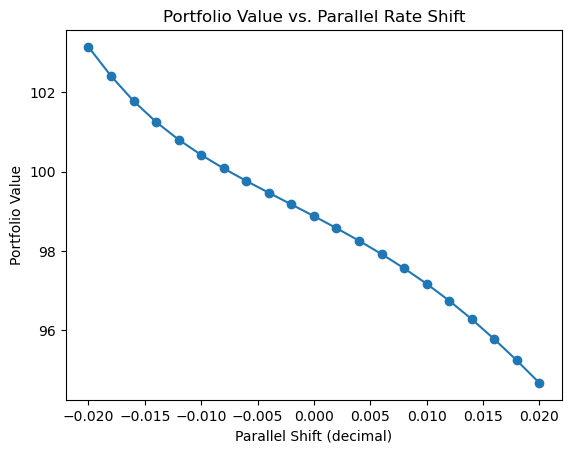

The shape of the plot can reveal convexity or lack thereof. In theory, the presence of options can introduce some convexity.


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def price_bond_from_discounts_shocked(df, annual_coupon_rate=0.036, face_value=100.0):
    coupon_amount = annual_coupon_rate * face_value / 4.0
    s = 0.0
    for t in [0.25 * i for i in range(1, 21)]:
        s += coupon_amount * df.loc[t, 'discount_shocked']
    s += face_value * df.loc[5.0, 'discount_shocked']
    return s

def price_cap_or_floor_new_otm_vol_shocked(strike, isCap=True, notional=100.0, freq=4, maturity=5.0, data=None):
    v = 0.0
    dt = 1.0 / freq
    for T_end in np.arange(dt, maturity + dt, dt):
        T_start = T_end - dt
        if T_start <= 0:
            continue
        disc = data.loc[T_end, 'discount_shocked']
        fwd  = data.loc[T_end, 'forward_shocked']
        if abs(strike - (atm_5y + 0.015)) < 1e-14:
            vol = 0.25
        elif abs(strike - (atm_5y - 0.015)) < 1e-14:
            vol = 0.50
        else:
            vol = curves.loc[T_end, 'flat vols']
        v_piece = notional * dt * blacks_formula(T_start, vol, strike, fwd, disc, isCap)
        v += v_piece
    return v

def rebuild_shocked_curves(base, shock=0.0):
    c = base.copy()
    c['spot_shocked'] = c['spot rates'] + shock
    c['discount_shocked'] = 0.0
    for t in c.index:
        r = c.loc[t,'spot_shocked']
        c.loc[t,'discount_shocked'] = 1.0/((1.0+r/4.0)**(4.0*t))
    c['forward_shocked'] = np.nan
    tenors = sorted(c.index)
    for i in range(1,len(tenors)):
        t0 = tenors[i-1]
        t1 = tenors[i]
        d0 = c.loc[t0,'discount_shocked']
        d1 = c.loc[t1,'discount_shocked']
        c.loc[t1,'forward_shocked'] = 4.0*(d0/d1 -1.0)
    return c

def price_portfolio_with_shock(shock):
    scurves = rebuild_shocked_curves(curves, shock)
    pb = price_bond_from_discounts_shocked(scurves, 0.036, 100.0)
    ca = price_cap_or_floor_new_otm_vol_shocked(strike_atm, True, 100.0, 4, 5.0, scurves)
    fa = price_cap_or_floor_new_otm_vol_shocked(strike_atm, False, 100.0, 4, 5.0, scurves)
    co = price_cap_or_floor_new_otm_vol_shocked(strike_plus_150, True, 100.0, 4, 5.0, scurves)
    fo = price_cap_or_floor_new_otm_vol_shocked(strike_minus_150, False, 100.0, 4, 5.0, scurves)
    return (pb * 1) + (ca * 1) + (fa * -1) + (co * -1) + (fo * 1)

shock_values = np.linspace(-0.02, 0.02, 21)
portfolio_values = [price_portfolio_with_shock(s) for s in shock_values]

plt.plot(shock_values, portfolio_values, marker='o')
plt.xlabel("Parallel Shift (decimal)")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Value vs. Parallel Rate Shift")
plt.show()

print("The shape of the plot can reveal convexity or lack thereof. In theory, the presence of options can introduce some convexity.") 


***

# 2.

Consider the following interest-rate tree which fits the data from Section 1.

Rates are continuously compounded.

In [20]:
sheet_tree = 'rate tree'

ratetree = pd.read_excel(FILEIN, sheet_name=sheet_tree).set_index('state')
ratetree.columns.name = 'time'

ratetree.style.format('{:.1%}',na_rep='').format_index('{:.2f}',axis=1)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75
state,,,,,,,,,,,,,,,,,,,,
0,4.2%,4.2%,4.3%,4.7%,5.2%,6.6%,8.0%,9.6%,10.8%,12.5%,14.1%,15.9%,17.5%,20.1%,24.1%,27.8%,30.6%,33.4%,37.3%,41.3%
1,,3.7%,3.7%,3.9%,4.1%,5.0%,5.9%,7.0%,7.9%,9.2%,10.5%,11.9%,13.2%,15.1%,18.1%,20.8%,23.0%,25.3%,28.4%,31.6%
2,,,3.2%,3.2%,3.3%,3.7%,4.3%,5.1%,5.8%,6.8%,7.8%,8.9%,9.9%,11.3%,13.5%,15.6%,17.3%,19.1%,21.7%,24.2%
3,,,,2.7%,2.6%,2.8%,3.2%,3.7%,4.2%,5.0%,5.8%,6.7%,7.4%,8.5%,10.2%,11.7%,13.0%,14.5%,16.5%,18.5%
4,,,,,2.1%,2.1%,2.3%,2.7%,3.1%,3.7%,4.3%,5.0%,5.6%,6.4%,7.6%,8.8%,9.8%,11.0%,12.6%,14.1%
5,,,,,,1.6%,1.7%,2.0%,2.2%,2.7%,3.2%,3.7%,4.2%,4.8%,5.7%,6.6%,7.4%,8.3%,9.6%,10.8%
6,,,,,,,1.3%,1.5%,1.6%,2.0%,2.4%,2.8%,3.2%,3.6%,4.3%,4.9%,5.5%,6.3%,7.3%,8.3%
7,,,,,,,,1.1%,1.2%,1.5%,1.7%,2.1%,2.4%,2.7%,3.2%,3.7%,4.2%,4.8%,5.6%,6.3%
8,,,,,,,,,0.9%,1.1%,1.3%,1.6%,1.8%,2.0%,2.4%,2.8%,3.1%,3.6%,4.2%,4.8%


### 2.1.

Use the binomial tree to price the vanilla bond from Section 1. (Not the whole portfolio.)

Recall that the bond has `quarterly` coupons.

Report the cashflow tree of this vanilla bond.

In [21]:
def bond_cashflow_tree(states, cols, face, coupon_annual, maturity):
    cf = pd.DataFrame(0, index=states, columns=cols)
    c = face * (coupon_annual / 4)
    tm = np.array(cf.columns.tolist())
    if maturity not in tm:
        tm = np.append(tm, maturity)
    tm = np.sort(tm)
    cf = cf.reindex(columns=tm, fill_value=0)
    pt = np.arange(0.25, maturity + 0.001, 0.25)
    for p in pt:
        if p < maturity:
            cf[p] = c
        else:
            cf[p] = face + c
    return cf

In [22]:
face_value=100
coupon_rate=0.036
maturity=5
cf_tree=bond_cashflow_tree(
    states=ratetree.index,
    cols=ratetree.columns,
    face=face_value,
    coupon_annual=coupon_rate,
    maturity=maturity
)
cf_tree.style.format(na_rep='').format_index('{:.2f}',axis=1)

time,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00
state,,,,,,,,,,,,,,,,,,,,,
0,0,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,100.900000
1,0,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,100.900000
2,0,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,100.900000
3,0,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,100.900000
4,0,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,100.900000
5,0,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,100.900000
6,0,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,100.900000
7,0,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,100.900000
8,0,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,100.900000


### 2.2. (10pts)

Report the tree of bond values.
* Note that there is no distinction betwen clean and dirty values, as the bond pays a coupon quarterly, so every node is immediately after a coupon, at which point clean and dirty are the same.

In [23]:
def accrued_interest(t, face, coupon_annual):
    lc = 0.25 * np.floor(t / 0.25)
    f = (t - lc) / 0.25
    return face * (coupon_annual / 4) * f

def bond_value_tree(ratetree, cf_tree, face, coupon_annual):
    tm = np.sort(cf_tree.columns)
    vd = pd.DataFrame(0, index=cf_tree.index, columns=tm)
    vd.loc[:, tm[-1]] = cf_tree.loc[:, tm[-1]]
    for i in range(len(tm) - 2, -1, -1):
        dt = tm[i+1] - tm[i]
        for s in vd.index:
            sd = s + 1 if s + 1 in vd.index else s
            ev = 0.5 * vd.loc[s, tm[i+1]] + 0.5 * vd.loc[sd, tm[i+1]]
            vd.loc[s, tm[i]] = cf_tree.loc[s, tm[i]] + np.exp(-ratetree.loc[s, tm[i]] * dt) * ev
    vc = vd.copy()
    for x in tm:
        vc[x] = vc[x] - accrued_interest(x, face, coupon_annual)
    return vd, vc

In [24]:
val_dirty,val_clean=bond_value_tree(ratetree,cf_tree,face_value,coupon_rate)
val_dirty.style.format(na_rep='').format_index('{:.2f}',axis=1)

,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00
state,,,,,,,,,,,,,,,,,,,,,
0,99.944280,98.962255,96.892738,94.612703,92.202230,89.673237,87.295730,85.061766,83.042095,81.160321,79.532735,78.153236,77.072076,76.293508,76.060287,76.768676,78.529670,81.400801,85.628486,91.900927,100.900000
1,,103.034706,101.318890,99.440485,97.431030,95.299297,93.219207,91.224555,89.376551,87.627352,86.084836,84.755835,83.686942,82.875894,82.506679,82.893151,84.115828,86.218477,89.391917,94.139360,100.900000
2,,,104.827105,103.264589,101.573593,99.762620,97.936126,96.154854,94.470199,92.854247,91.402834,90.130465,89.078919,88.241876,87.755279,87.863578,88.626062,90.079857,92.376699,95.888100,100.900000
3,,,,106.258076,104.811644,103.250964,101.632843,100.033481,98.495159,97.003268,95.640248,94.424373,93.392156,92.535140,91.951635,91.829631,92.213494,93.136778,94.722461,97.247405,100.900000
4,,,,,107.317272,105.946836,104.495515,103.046481,101.634037,100.252061,98.969758,97.806501,96.793570,95.921743,95.260777,94.953855,95.034666,95.534179,96.553232,98.299934,100.900000
5,,,,,,108.012803,106.692525,105.364998,104.057789,102.769911,101.558375,100.441972,99.447085,98.564623,97.843207,97.391098,97.234178,97.400929,97.974505,99.112523,100.900000
6,,,,,,,108.367414,107.136539,105.915508,104.706227,103.554972,102.479005,101.500304,100.610432,99.842688,99.278466,98.937825,98.846583,99.073411,99.738455,100.900000
7,,,,,,,,108.483038,107.331510,106.186694,105.085718,104.043864,103.079258,102.184386,101.381624,100.731905,100.250862,99.961497,99.920443,100.219777,100.900000
8,,,,,,,,,108.406375,107.313716,106.254017,105.240456,104.287861,103.389735,102.560789,101.846486,101.259053,100.818630,100.571792,100.589410,100.900000


### 2.3. (10pts)

Report the cashflow tree of a **structured note** defined below.

* Same maturity as the bond in `2.1`.
* Pays quarterly coupons.

But the coupon is more complicated...
* Coupon is the floating rate (in the tree)
* Paid one quarter later. (So set at $t$ and paid out at $t+.25$)
* Coupon cannot go below `2%` reference rate.
* Coupon cannot go above `5%` reference rate.

Note that unlike a vanilla bond, the cashflow depends on the node of the tree, and it determines the cashflow received one step later.

Thus the cashflow tree should show the cashflow **determined** at that node, even though it is paid out one period later. Given this, you should report the determined cashflow, discounted back one period by the continuously-compounded rate at that same node. So this discounted-determined cashflow is solelly a function of the rate at the node.

#### Careful
You are not being asked to report the **valuation** tree of the structured note--just the cashflow tree.

In [25]:
def structured_note_cashflow_tree(ratetree, face, floor_rate, cap_rate, maturity):
    times = sorted(ratetree.columns)
    cf_tree = pd.DataFrame(0.0, index=ratetree.index, columns=times)

    for s in ratetree.index:
        for t in times:
            rate = ratetree.loc[s, t]
            if int(float(t)) + 0.25 <= maturity:
                floored  = max(rate, floor_rate)
                floored_cap = min(floored, cap_rate)
                raw_coupon = face * floored_cap * 0.25
                discounted_coupon = raw_coupon * np.exp(-rate * 0.25)
                cf_tree.loc[s, t] = discounted_coupon
            
            if np.isclose(int(float(t)), maturity):
                cf_tree.loc[s, t] += face

    return cf_tree

In [26]:
structured_note_cashflow_tree(ratetree, face=100, floor_rate=0.02, cap_rate=0.05, maturity=5).style.format(na_rep='')

,0.000000,0.250000,0.500000,0.750000,1.000000,1.250000,1.500000,1.750000,2.000000,2.250000,2.500000,2.750000,3.000000,3.250000,3.500000,3.750000,4.000000,4.250000,4.500000,4.750000
state,,,,,,,,,,,,,,,,,,,,
0,1.038313,1.047411,1.059841,1.157471,1.233997,1.229444,1.225219,1.220311,1.216648,1.211531,1.206697,1.201383,1.196399,1.188670,1.176867,1.166166,1.157827,1.149877,1.138577,1.127365
1,,0.906161,0.916931,0.961950,1.019969,1.225260,1.231715,1.228259,1.225562,1.221597,1.217717,1.213432,1.209502,1.203673,1.194780,1.186643,1.180043,1.173449,1.164199,1.155096
2,,,0.793134,0.799184,0.817453,0.919575,1.072760,1.234093,1.232111,1.229052,1.225961,1.222529,1.219443,1.215060,1.208383,1.202220,1.197026,1.191612,1.184100,1.176760
3,,,,0.663771,0.654876,0.689611,0.791729,0.926173,1.041373,1.227361,1.232115,1.229382,1.226967,1.223679,1.218679,1.214026,1.209957,1.205548,1.199485,1.193600
4,,,,,0.524459,0.516851,0.583878,0.677760,0.762447,0.905454,1.058116,1.229396,1.232652,1.230189,1.226452,1.222947,1.219771,1.216204,1.211337,1.206639
5,,,,,,0.498060,0.497844,0.497516,0.557802,0.667395,0.787434,0.923017,1.039275,1.184984,1.232311,1.229675,1.227203,1.224333,1.220443,1.216706
6,,,,,,,0.498412,0.498185,0.497957,0.497536,0.585580,0.692445,0.783022,0.892209,1.056779,1.213347,1.232820,1.230523,1.227424,1.224461
7,,,,,,,,0.498675,0.498507,0.498187,0.497819,0.519164,0.589571,0.671270,0.794106,0.911927,1.029787,1.174703,1.232768,1.230423
8,,,,,,,,,0.498910,0.498666,0.498381,0.498051,0.497777,0.504759,0.596323,0.684856,0.776280,0.891762,1.046166,1.192565


***